In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:

img=np.array([[0,1,2,3,4,5,6],
              [0,0,1,2,3,4,5],
              [0,0,0,1,2,3,4],
              [0,0,0,0,1,2,3],
              [0,0,0,0,0,1,2],
              [0,0,0,0,0,0,1]])
img2=cv.imread('D:/imageprocessing/trans_negative.jpg',0)
img3=cv.imread('D:/imageprocessing/aasdf.png',0)


In [4]:
def histogram(img):
    w=img.shape[0]
    h=img.shape[1]
    his=np.zeros(np.max(img)+1)
    for x in  range (w):
        for y in range (h):
            pixel=img[x,y]
            his[pixel]+=1
    return his
def auto_thesshold(img):
    h_g=histogram(img)
    T_g=np.cumsum(h_g)
    A_g=[]
    for i, his in enumerate(h_g): A_g.append(i*his)
    A_g=np.array(A_g)
    B_g=np.cumsum(A_g)
    M_g=[]
    for i in range(len(A_g)):
        M_g.append(B_g[i]/T_g[i])
    M_g=np.array(M_g)
    f_g =lambda a,b:a/(img.shape[0]*img.shape[1]-a)*(b-np.max(M_g))**2
    F_g=[]
    for i in range(len(A_g)-1):
        F_g.append(f_g(T_g[i],M_g[i]))
    theshold=np.argmax(F_g)
    print(theshold)
    new_img=np.where(img>=theshold,255,0)
    return new_img

In [5]:
img_segmentation=auto_thesshold(img)


1


In [6]:
print(img_segmentation)

[[  0 255 255 255 255 255 255]
 [  0   0 255 255 255 255 255]
 [  0   0   0 255 255 255 255]
 [  0   0   0   0 255 255 255]
 [  0   0   0   0   0 255 255]
 [  0   0   0   0   0   0 255]]


In [7]:
def plot(img,new_img):
    fig, axs = plt.subplots(1, 2,figsize=(10,5))

    # Hiển thị ảnh 1 trong ô đầu tiên
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title('ảnh gốc')

    # Hiển thị ảnh 2 trong ô thứ hai
    axs[1].imshow(new_img, cmap='gray')    
    axs[1].set_title('ảnh đã biến đổi')
    plt.show()



In [8]:

# tách ngưỡng nhị phân
img_segmentation1=auto_thesshold(img2)

88


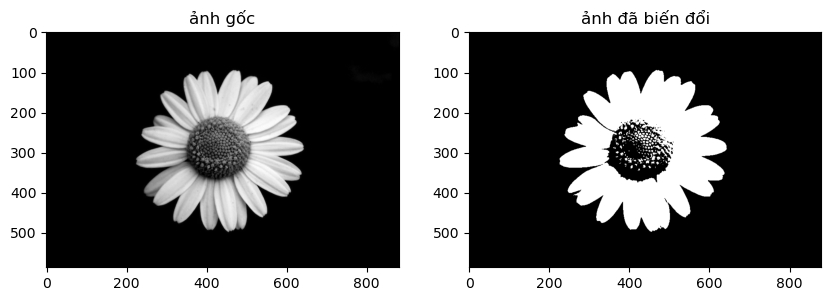

In [9]:
plot(img2,img_segmentation1)


42


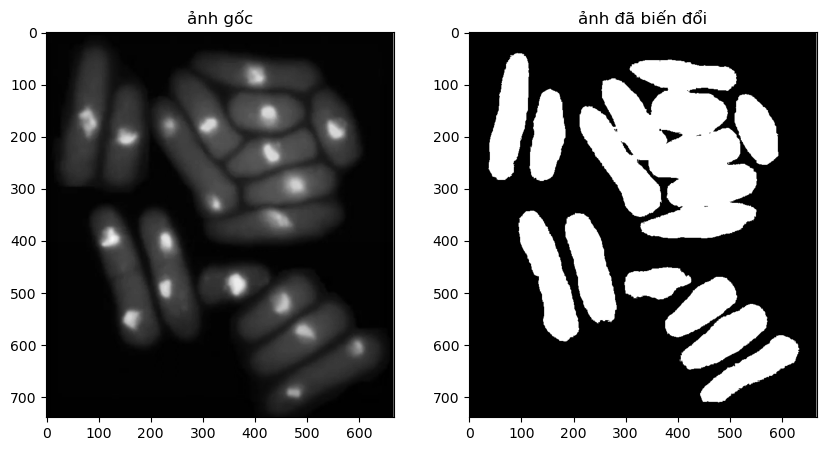

In [10]:
#tách ngưỡng nhị phân toàn cục
img_segmentation2=auto_thesshold(img3)
plot(img3,img_segmentation2)

In [11]:

# tách ngưỡng theo từng khu vực
# Xử dụng trung bình 
img_adaptiveThesh1 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)

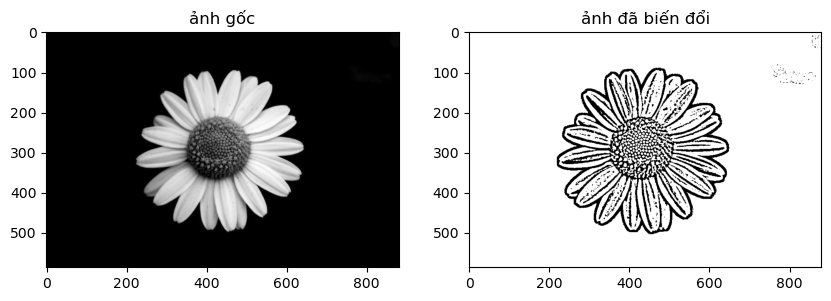

In [12]:
plot(img2,img_adaptiveThesh1)

In [13]:
# xử dụng phân bố gauss
img_adaptiveThresh2 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

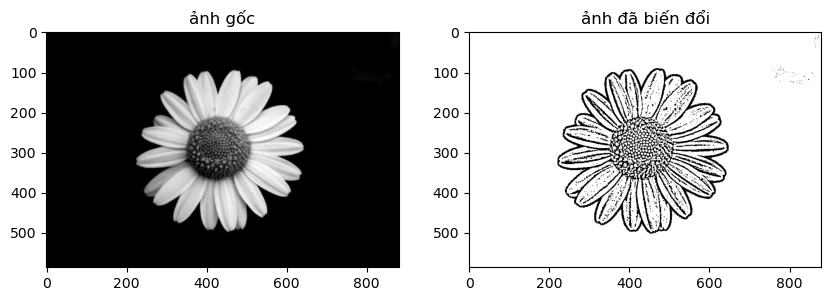

In [14]:
plot(img2,img_adaptiveThresh2)

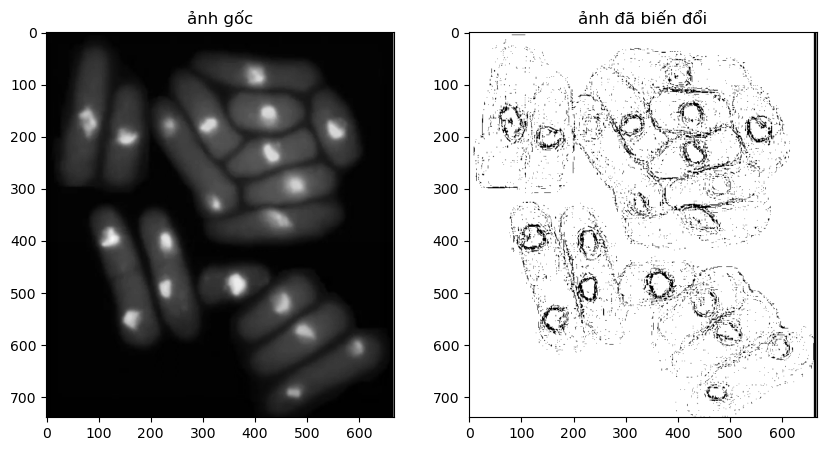

In [15]:
img_adaptiveThesh3=cv.adaptiveThreshold(img3,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
plot(img3,img_adaptiveThesh3)

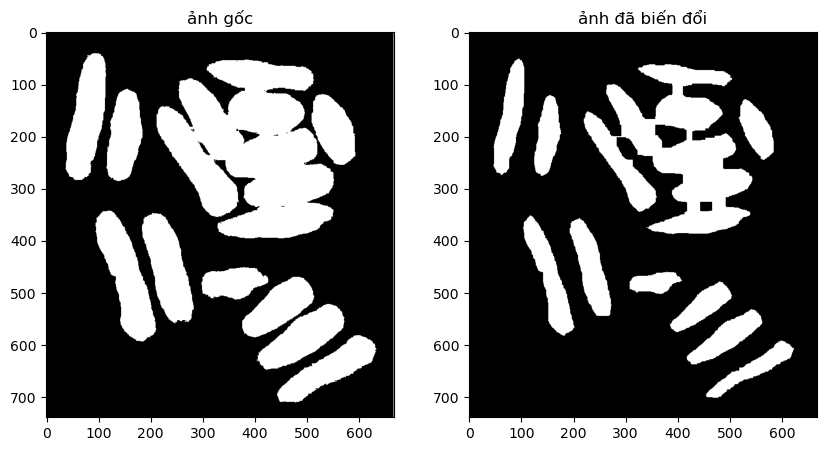

In [16]:
kernel = np.ones((5,5),np.uint8)
img_segmentation2 = img_segmentation2.astype(np.uint8)
erosion = cv.erode(img_segmentation2,kernel,iterations = 4)
plot(img_segmentation2,erosion)

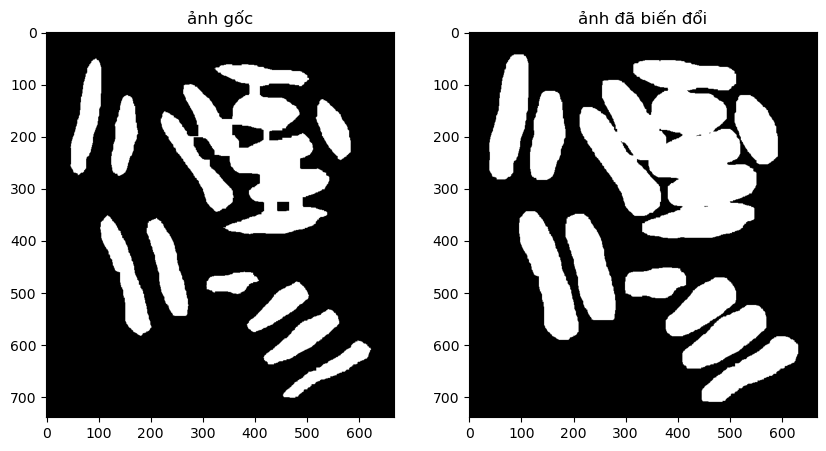

In [17]:
dilation = cv.dilate(erosion,kernel,iterations = 4)
plot(erosion,dilation)

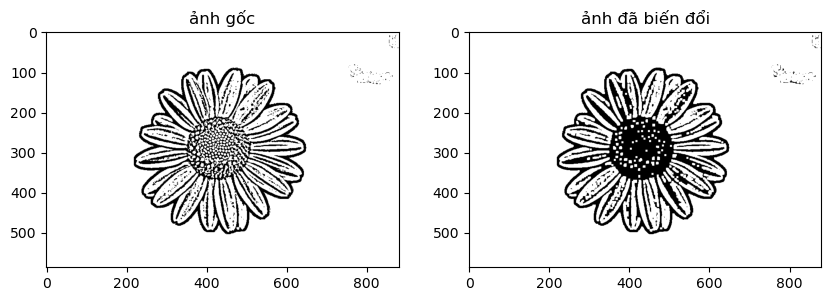

In [18]:

opening = cv.morphologyEx(img_adaptiveThesh1, cv.MORPH_OPEN, kernel)
plot(img_adaptiveThesh1,opening)

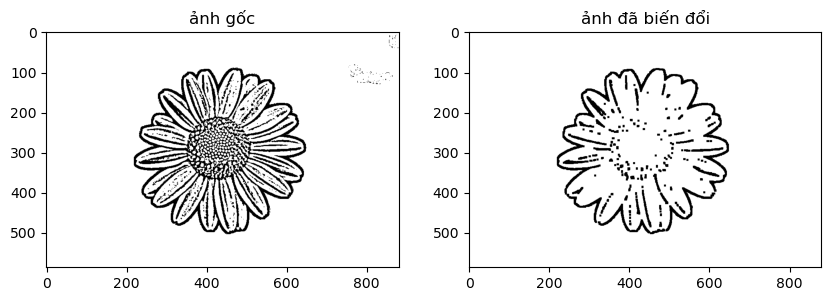

In [19]:
closing = cv.morphologyEx(img_adaptiveThesh1, cv.MORPH_CLOSE, kernel)
plot(img_adaptiveThesh1,closing)

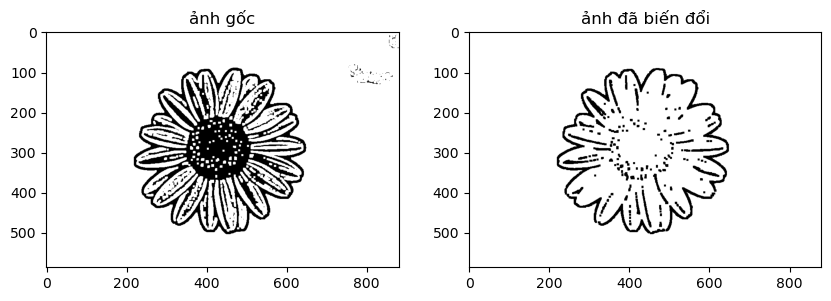

In [20]:
closing = cv.morphologyEx(closing, cv.MORPH_CLOSE, kernel)
plot(opening,closing)

In [21]:

contours, hierarchy = cv.findContours(closing, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)


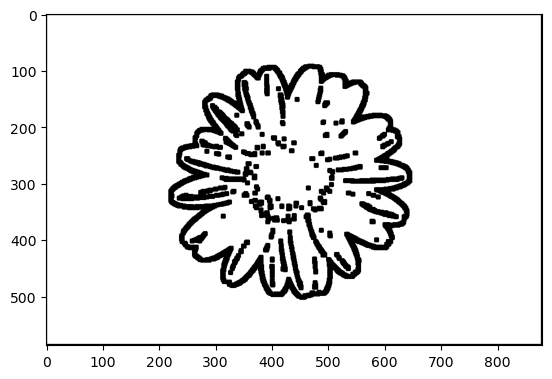

In [22]:

draw=cv.drawContours (closing, contours, -1, (0,255,0), 2)
plt.imshow(draw,cmap='gray')